In [1]:
from IPython.display import display, Image

In [2]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
print(np.__version__)
print(matplotlib.__version__)

1.20.1
3.3.4


In [4]:
# 설치가 안되어 있을 경우, 설치 필요.
import mglearn
import sklearn
print( sklearn.__version__)
print( mglearn.__version__)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

0.24.1
0.1.9


w[0]: 0.393906  b: -0.031804


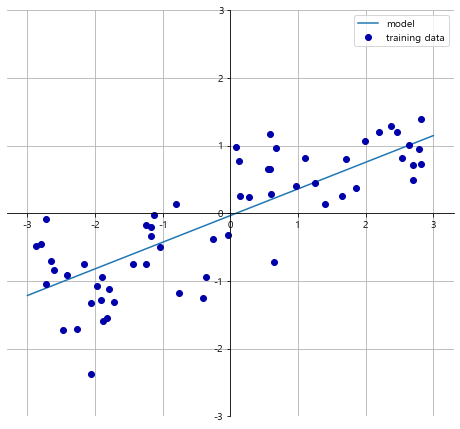

In [5]:
mglearn.plots.plot_linear_regression_wave()

### 보스턴 교외 주택 정보

In [6]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [7]:
boston = load_boston()
X = boston.data
y = boston.target

In [8]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

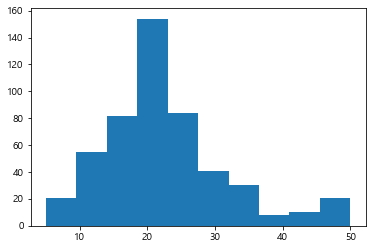

In [9]:
plt.hist(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred[:10]

array([28.83885359, 36.00783288, 15.08324755, 25.23090886, 18.87864064,
       23.21398327, 17.5931124 , 14.30508093, 23.05438985, 20.62008346])

In [14]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
mse

22.098694827098036

In [17]:
dict_dat = {"실제값": y_test, "예측값":pred, "오차":y_test-pred}
dat = pd.DataFrame(dict_dat)
dat

,실제값,예측값,오차
0,23.6,28.838854,-5.238854
1,32.4,36.007833,-3.607833
2,13.6,15.083248,-1.483248
3,22.8,25.230909,-2.430909
4,16.1,18.878641,-2.778641
...,...,...,...
122,8.8,3.284209,5.515791
123,19.2,23.798796,-4.598796
124,25.3,25.733299,-0.433299
125,20.4,23.048156,-2.648156


In [18]:
dat.shape[0]

127

In [19]:
dat["오차제곱"] = dat["오차"] ** 2
mse_val = dat["오차제곱"].sum() / dat.shape[0]
mse_val

22.098694827098036

In [20]:
nmse =  np.sqrt(mse_val)
nmse

4.700924890603766

In [23]:
mae = np.abs(dat["오차"]).sum() / dat.shape[0]
mae

3.060939595437034

In [24]:
print("학습용 데이터 결정 계수 : {:.2f}".format(model.score(X_train, y_train)))
print("테스트 데이터 결정 계수 : {:.2f}".format(model.score(X_test, y_test)))

학습용 데이터 결정 계수 : 0.75
테스트 데이터 결정 계수 : 0.68


In [35]:
for tsize in range(1,6,1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size= tsize / 10)
    model = LinearRegression()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(f"테스트 비율: { (10 - tsize) } : { tsize }")
    print("학습용 데이터 결정 계수 : {:.2f}".format(model.score(X_train, y_train)))
    print("테스트 데이터 결정 계수 : {:.2f}".format(model.score(X_test, y_test)))
    print("MSE : {:.2f}".format(mse))
    print("RMSE : {:.2f}".format(np.sqrt(mse)))

테스트 비율: 9 : 1
학습용 데이터 결정 계수 : 0.74
테스트 데이터 결정 계수 : 0.76
MSE : 15.00
RMSE : 3.87
테스트 비율: 8 : 2
학습용 데이터 결정 계수 : 0.75
테스트 데이터 결정 계수 : 0.67
MSE : 24.29
RMSE : 4.93
테스트 비율: 7 : 3
학습용 데이터 결정 계수 : 0.74
테스트 데이터 결정 계수 : 0.71
MSE : 21.52
RMSE : 4.64
테스트 비율: 6 : 4
학습용 데이터 결정 계수 : 0.75
테스트 데이터 결정 계수 : 0.71
MSE : 21.83
RMSE : 4.67
테스트 비율: 5 : 5
학습용 데이터 결정 계수 : 0.77
테스트 데이터 결정 계수 : 0.69
MSE : 25.18
RMSE : 5.02


### 릿지, 라쏘 회귀 - 회귀

In [38]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge

In [40]:
boston = load_boston()
print(type(boston.data), type(boston.target))

df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston["price"] = pd.Series(boston.target)
df_boston.head()

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [41]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

In [43]:
X = df_boston.loc [:, "CRIM":"LSTAT"]
y = df_boston["price"]

print(X.shape, y.shape)
print(df_boston["CRIM"].min(), df_boston["CRIM"].max())
print(df_boston["NOX"].min(), df_boston["NOX"].max())

(506, 13) (506,)
0.00632 88.9762
0.385 0.871


In [46]:
### 데이터 정규화  - 0 ~ 1 사이로 두는 것
nor_X = MinMaxScaler().fit_transform(X)

print(np.min(nor_X[0]) , np.max(nor_X[0]))

0.0 0.9999999999999999


In [47]:
ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(nor_X)

print(ex_X.shape, y.shape)

(506, 104) (506,)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)

model = LinearRegression().fit(X_train, y_train)

print(model.score(X_train, y_train), model.score(X_test, y_test))

0.7480872598623441 0.6844267283527123


### feature을 많이 만든 후 계산 시 -> 과대적합 발생

In [49]:
X_train, X_test, y_train, y_test = train_test_split(ex_X, y , random_state=42)

ex_model = LinearRegression().fit(X_train, y_train)

print(ex_model.score(X_train, y_train), ex_model.score(X_test, y_test))

0.9448313975211593 0.7758378393351725


### lasso 회귀 적용

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)

lasso_model = Lasso().fit(X_train, y_train)

print(lasso_model.score(X_train, y_train), lasso_model.score(X_test, y_test))

0.6948040743556284 0.6516957380017043


### Ridge 회귀 적용

In [53]:
ridge_model = Ridge().fit(X_train, y_train)

print(ridge_model.score(X_train, y_train), ridge_model.score(X_test, y_test))

0.7461161787884156 0.6789748327846077


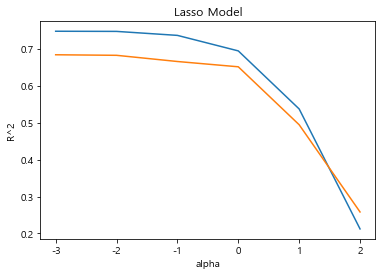

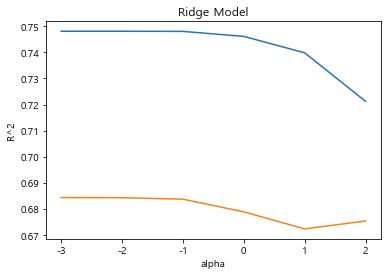

[13, 13, 12, 10, 4, 2]


In [57]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

lasso_test = []
lasso_train = []
# 사용한 특성의 수
lasso_coef = []

ridge_test = []
ridge_train = []


for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_train.append(lasso.score(X_train, y_train))
    lasso_test.append(lasso.score(X_test, y_test))
    lasso_coef.append(np.sum(lasso.coef_ != 0))
    
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_train.append(ridge.score(X_train, y_train))
    ridge_test.append(ridge.score(X_test, y_test))
    
plt.plot(np.log10(alpha_list), lasso_train)
plt.plot(np.log10(alpha_list), lasso_test)
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.title("Lasso Model")
plt.show()

plt.plot(np.log10(alpha_list), ridge_train)
plt.plot(np.log10(alpha_list), ridge_test)
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.title("Ridge Model")
plt.show()

print(lasso_coef)

C:\Users\jypark\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 864.3796550250048, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(
C:\Users\jypark\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.848133364149362, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


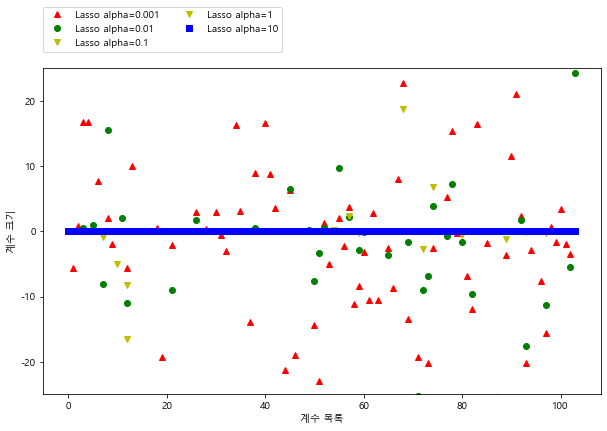

In [61]:
X_train, X_test, y_train, y_test = train_test_split(ex_X, y , random_state=42)

lasso0001 = Lasso(alpha=0.001).fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
lasso01 = Lasso(alpha=0.1).fit(X_train, y_train)
lasso = Lasso(alpha=1).fit(X_train, y_train)
lasso10 = Lasso(alpha=10).fit(X_train, y_train)


plt.figure(figsize=(10,6))
plt.plot(lasso0001.coef_, "r^", label="Lasso alpha=0.001")
plt.plot(lasso001.coef_, 'go', label="Lasso alpha=0.01")
plt.plot(lasso01.coef_, 'yv', label="Lasso alpha=0.1")
plt.plot(lasso.coef_, 'yv', label="Lasso alpha=1")
plt.plot(lasso10.coef_, "bs", label="Lasso alpha=10")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1.05))
plt.show()

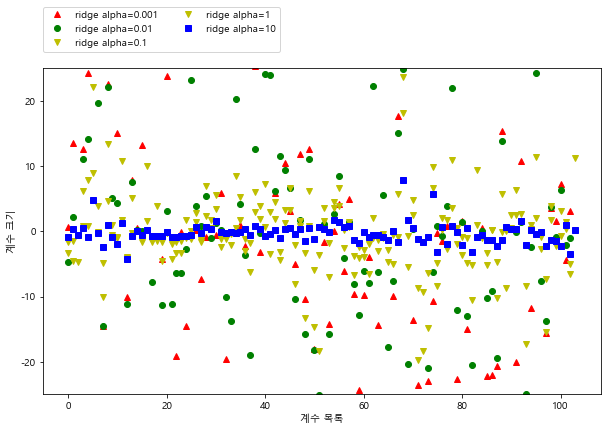

In [62]:
X_train, X_test, y_train, y_test = train_test_split(ex_X, y , random_state=42)

ridge0001 = Ridge(alpha=0.001).fit(X_train, y_train)
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge = Ridge(alpha=1).fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)


plt.figure(figsize=(10,6))
plt.plot(ridge0001.coef_, "r^", label="ridge alpha=0.001")
plt.plot(ridge001.coef_, 'go', label="ridge alpha=0.01")
plt.plot(ridge01.coef_, 'yv', label="ridge alpha=0.1")
plt.plot(ridge.coef_, 'yv', label="ridge alpha=1")
plt.plot(ridge10.coef_, "bs", label="ridge alpha=10")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1.05))
plt.show()